## Flow  based Detection

Steps of building a Network packet detection model

- Data Processing

- Building the RNN Bidirectional LSTM

- Generating the Prediction visualization

In [3]:
import os
import pandas as pd
os.chdir('C:\\Users\\Brook\\Desktop\\#SMU_Courses\\#MSDS 6130 Capstone A & B\\MSDS6120 CapstoneA\\#ProjectData&NoteBook')

In [4]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
print ( "Current working dir : %s" % os.getcwd())

Current working dir : C:\Users\Brook\Desktop\#SMU_Courses\#MSDS 6130 Capstone A & B\MSDS6120 CapstoneA\#ProjectData&NoteBook


In [6]:
# Training data set that was hot encoded 

df_flow= pd.read_csv("FinalDataFrame_HotEncodings_Flow.csv")




In [7]:
df_flow.head(5)

,Unnamed: 0,id,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,...,dtcpb,tcprtt,smean,dmean,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_dst_src_ltm,ct_src_ltm,label
0,0,1,0.121478,6,4,74.087490,252,254,14158.942380,8495.365234,...,2202533631,0.000000,43,43,1,0,1,1,1,0
1,1,2,0.649902,14,38,78.473372,62,252,8395.112305,503571.312500,...,3077387971,0.000000,52,1106,43,1,1,2,1,0
2,2,3,1.623129,8,16,14.170161,62,252,1572.271851,60929.230470,...,2963114973,0.111897,46,824,7,1,2,3,2,0
3,3,4,1.681642,12,12,13.677108,62,252,2740.178955,3358.622070,...,1047442890,0.000000,52,64,1,1,2,3,2,0
4,4,5,0.449454,10,6,33.373826,254,252,8561.499023,3987.059814,...,1977154190,0.128381,53,45,43,1,2,40,2,0


In [8]:
df_flowTest= pd.read_csv("UNSW_NB15_testing_set.csv")

In [9]:
df_flow23=  pd.read_csv("UNSW_NB15_training_set.csv")

In [10]:
df_flowTest.shape

(82332, 45)

In [11]:
pd.set_option('display.max_columns', None)
df_flowTest.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [12]:
pd.set_option('display.max_columns', None)
df_flow.head()

,Unnamed: 0,id,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,tcprtt,smean,dmean,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_dst_src_ltm,ct_src_ltm,label
0,0,1,0.121478,6,4,74.087490,252,254,14158.942380,8495.365234,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,0.000000,43,43,1,0,1,1,1,0
1,1,2,0.649902,14,38,78.473372,62,252,8395.112305,503571.312500,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,0.000000,52,1106,43,1,1,2,1,0
2,2,3,1.623129,8,16,14.170161,62,252,1572.271851,60929.230470,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,0.111897,46,824,7,1,2,3,2,0
3,3,4,1.681642,12,12,13.677108,62,252,2740.178955,3358.622070,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,0.000000,52,64,1,1,2,3,2,0
4,4,5,0.449454,10,6,33.373826,254,252,8561.499023,3987.059814,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,0.128381,53,45,43,1,2,40,2,0


In [13]:
df_flow.shape

(175341, 26)

In [14]:
df_flow.columns

Index(['Unnamed: 0', 'id', 'dur', 'spkts', 'dpkts', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb',
       'dtcpb', 'tcprtt', 'smean', 'dmean', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'label'],
      dtype='object')

In [15]:
df_flow = df_flow.drop('Unnamed: 0', 1)

In [16]:
# Do we need to drop id ????

In [17]:
df_flow.columns

Index(['id', 'dur', 'spkts', 'dpkts', 'rate', 'sttl', 'dttl', 'sload', 'dload',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'tcprtt',
       'smean', 'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_dst_src_ltm', 'ct_src_ltm', 'label'],
      dtype='object')

In [18]:
# split the data into train and test set 
data_training, data_testing = train_test_split(df_flow, test_size=0.3, random_state=42, shuffle=True)


In [19]:
pd.set_option('display.max_columns', None)
data_training.head()
data_training.shape

(122738, 25)

In [20]:

pd.set_option('display.max_columns', None)
#data_testing.head()
#data_training.shape
data_testing.shape

(52603, 25)

In [21]:
# Feature Scaling (Normalisation)
# Compare the effect of different scalers on data with outliers
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[9.11217192e-01, 1.33333358e-07, 1.04004160e-04, ...,
        5.00000000e-01, 6.20000000e-01, 1.00000000e+00],
       [1.95200128e-01, 2.44660045e-03, 6.76027041e-03, ...,
        4.68750000e-02, 2.00000000e-02, 0.00000000e+00],
       [9.44512884e-01, 1.33333358e-07, 1.04004160e-04, ...,
        2.65625000e-01, 2.00000000e-01, 1.00000000e+00],
       ...,
       [7.52438148e-01, 1.33333358e-07, 1.04004160e-04, ...,
        5.00000000e-01, 3.00000000e-01, 1.00000000e+00],
       [8.37616489e-01, 6.66666789e-08, 1.04004160e-04, ...,
        5.46875000e-01, 7.20000000e-01, 1.00000000e+00],
       [6.95553731e-01, 1.50000028e-07, 1.04004160e-04, ...,
        3.59375000e-01, 3.00000000e-01, 1.00000000e+00]])

In [22]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

In [23]:
data_training.shape[0]

122738

In [24]:
for i in range(60, data_training.shape[0]):
# Creates the 60 timesteps of each value. E.g. row 1 = 0 -> 59, row 2 = 1 -> 60    
#for i in range(60, 122738):
    X_train.append(data_training[i-60:i])
    # Contains the next value after the 60 timesteps. E.g. row 1 = last value of row 2, row 2 = last value of row 3
    # This is used to predict the next value (future value)
    y_train.append(data_training[i,0])
    

In [25]:
# Convert to numpy array to be accepted in our BIDIRECTIONAL LSTM
X_train, y_train = np.array(X_train),np.array(y_train)

In [28]:
#This data can be framed as 122678 sample with 60 time steps and 25 features
X_train.shape

(122678, 60, 25)

In [29]:
X_train.shape[1]

60

In [27]:
 y_train.shape

(122678,)

#### Building Bidirectional  LSTM

In [28]:
# Importing the Keras libraries and package
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

Using TensorFlow backend.


In [35]:
# Bidirectional(LSTM)
# activation = 'relu'
# https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/
# https://stats.stackexchange.com/questions/226923/why-do-we-use-relu-in-neural-networks-and-how-do-we-use-it
# units =

# Initialising the RNN BILSTM
regressior = Sequential()

# Adding the first BIDIRECTIONAL LSTM layer and some Dropout regularisation
"""
50 neurons in our layer, return sequences is used when having additional layers.
Input shape only needs the timesteps and input_dim as the batch_size is taken into account automatically.
"""
regressior.add(Bidirectional(LSTM(units =50,activation = 'relu', return_sequences = True), 
                             input_shape = (X_train.shape[1],25)))
# Ignore 20% of the neurons
regressior.add(Dropout(0.2))

# Adding the second BIDIR-LSTM layer and some Dropout regularisation
regressior.add(Bidirectional(LSTM(units =50,activation = 'relu', return_sequences = True)))
regressior.add(Dropout(0.2))

# Adding the third BIDIR-LSTM layer and some Dropout regularisation
regressior.add(Bidirectional(LSTM(units =50,activation = 'relu', return_sequences = True)))
regressior.add(Dropout(0.2))

# Adding the fourth BIDIR-LSTM layer and some Dropout regularisation
regressior.add(Bidirectional(LSTM(units =50,activation = 'relu')))
regressior.add(Dropout(0.2))

# Adding the output layer
regressior.add(Dense(units = 1))


In [36]:
# https://www.datatechnotes.com/2019/12/multi-output-regression-example-with_24.html
regressior.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_9 (Bidirection (None, 60, 100)           30400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 60, 100)           60400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 60, 100)           60400     
_________________________________________________________________
dropout_11 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 100)              

In [37]:
# https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
# Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
# https://keras.io/api/optimizers/adam/

# Compiling the BIDIR-LSTM
regressior.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [38]:
import keras
keras.__version__
# Version 2.4.3 is causing problem in epoch , data set doesnt go over all the data , so change it to '2.3.1'

'2.3.1'

In [40]:
# to fix that do the following from conda comand prompt , Now you have to install tensorflow v 2.1.0:
#pip uninstall tensorflow
#python3 -m pip uninstall protobuf    
#python3 -m pip uninstall tensorflow-gpu
#pip install tensorflow==2.1.0
# pip uninstall keras
#and then install keras v 2.3.1:
#pip install keras==2.3.1


In [41]:
# However, increasing the epochs isn't always necessarily a bad thing. Sure, it will add to your training time, 
# but it can also help make your model even more accurate, especially if your training data set is unbalanced. 
# However, with increasing epochs you do run the risk of your NN over-fitting the data

# I got best results with a batch size of 32 and epochs = 100 while training a Sequential model in Keras with 3 hidden layers.
# Generally batch size of 32 or 25 is good, with epochs = 100 unless you have large dataset. in case of large dataset 
# you can go with batch size of 10 with epochs b/w 50 to 100.

# Epoch is the number of passes over the data. Loss is the error over the training set typically in terms of mean 
# squared error (for regression) or log loss (for classification)
# https://stackoverflow.com/questions/34673396/what-does-the-standard-keras-model-output-mean-what-is-epoch-and-loss-in-keras


# Fitting the RNN to the Training set
history = regressior.fit(X_train, y_train, epochs = 5, batch_size = 32).history

Epoch 1/5
122678/122678 [==============================] - 707s 6ms/step - loss: 0.0851
Epoch 2/5
122678/122678 [==============================] - 603s 5ms/step - loss: 0.0840
Epoch 3/5
122678/122678 [==============================] - 574s 5ms/step - loss: 0.0837
Epoch 4/5
122678/122678 [==============================] - 587s 5ms/step - loss: 0.0836
Epoch 5/5
122678/122678 [==============================] - 564s 5ms/step - loss: 0.0835


In [83]:
#history

In [42]:
%config IPCompleter.greedy=True
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf 
import matplotlib as matplot
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# does ID coloumn over fit my data , ?
# https://datascience.stackexchange.com/questions/33284/should-i-eliminate-all-id-columns-and-similar-columns-from-training-data
# https://stats.stackexchange.com/questions/224565/overfitting-due-to-a-unique-identifier-among-features

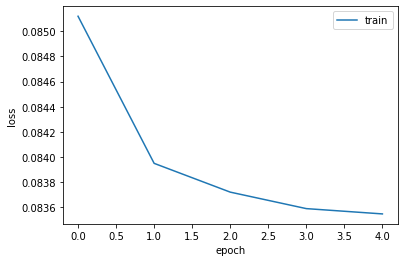

In [44]:

plt.plot(history['loss'])
#plt.plot(history['val_loss'])
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [45]:
#pip install keras_sequential_ascii

In [65]:
# To get model summary 
#from keras_sequential_ascii import keras2ascii
#keras2ascii(regressior)

### Part 3 - Making the predictions 

In [66]:
import pandas as pd

In [67]:
# Getting the test Data set

In [68]:
data_testing.shape

(52603, 25)

In [69]:
# Getting the real Attacks and the from the test data portion of the train data set

In [70]:
len(data_testing.columns)

25

In [71]:
data_testing.iloc[:, -1]

15482     0
133349    1
80485     1
29972     0
18339     0
         ..
18386     0
156181    1
122725    1
27731     0
88528     1
Name: label, Length: 52603, dtype: int64

In [51]:
data_testing.iloc[:, :-1].values

array([[1.548300e+04, 2.736664e+00, 2.320000e+02, ..., 5.000000e+00,
        5.000000e+00, 4.000000e+00],
       [1.333500e+05, 9.000000e-06, 2.000000e+00, ..., 1.000000e+01,
        1.000000e+01, 1.000000e+01],
       [8.048600e+04, 5.788526e+00, 3.600000e+01, ..., 2.000000e+00,
        4.000000e+00, 2.000000e+00],
       ...,
       [1.227260e+05, 7.000000e-06, 2.000000e+00, ..., 1.000000e+00,
        2.000000e+00, 2.000000e+00],
       [2.773200e+04, 1.004725e+00, 5.200000e+01, ..., 7.000000e+00,
        1.000000e+00, 2.000000e+00],
       [8.852900e+04, 4.000000e-06, 2.000000e+00, ..., 2.000000e+00,
        5.000000e+00, 2.000000e+00]])

In [108]:
data_testing.iloc[:,24:25].values

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [109]:
#https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
#Attack_status is label
Real_intrusion = data_testing.iloc[:,24:25].values

In [147]:
Real_intrusion


array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [88]:
data_testing.head()


,id,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,tcprtt,smean,dmean,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_dst_src_ltm,ct_src_ltm,label
15482,15483,2.736664,232,438,244.458211,31,29,3.885899e+04,1.598925e+06,11.845558,6.261361,4449.110313,3234.831566,255,486483908,492604340,0.000558,58,1252,11,0,5,5,4,0
133349,133350,0.000009,2,0,111111.107200,254,0,5.066666e+07,0.000000e+00,0.009000,0.000000,0.000000,0.000000,0,0,0,0.000000,57,0,10,2,10,10,10,1
80485,80486,5.788526,36,34,11.920133,254,252,8.199669e+03,5.221364e+03,165.386453,172.345750,8561.040438,249.950547,255,3835852222,201002858,0.158826,170,114,4,1,2,4,2,1
29972,29973,3.849634,448,858,338.993271,31,29,5.216912e+04,2.272451e+06,8.669644,4.496707,4053.086020,2918.730804,255,2802824152,661443578,0.000558,56,1276,9,0,3,6,2,0
18339,18340,0.001052,2,2,2851.711087,31,29,4.942966e+05,6.159696e+05,0.008000,0.007000,0.000000,0.000000,0,0,0,0.000000,65,81,3,0,4,1,3,0


In [89]:
data_testing.head()

,id,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,tcprtt,smean,dmean,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_dst_src_ltm,ct_src_ltm,label
15482,15483,2.736664,232,438,244.458211,31,29,3.885899e+04,1.598925e+06,11.845558,6.261361,4449.110313,3234.831566,255,486483908,492604340,0.000558,58,1252,11,0,5,5,4,0
133349,133350,0.000009,2,0,111111.107200,254,0,5.066666e+07,0.000000e+00,0.009000,0.000000,0.000000,0.000000,0,0,0,0.000000,57,0,10,2,10,10,10,1
80485,80486,5.788526,36,34,11.920133,254,252,8.199669e+03,5.221364e+03,165.386453,172.345750,8561.040438,249.950547,255,3835852222,201002858,0.158826,170,114,4,1,2,4,2,1
29972,29973,3.849634,448,858,338.993271,31,29,5.216912e+04,2.272451e+06,8.669644,4.496707,4053.086020,2918.730804,255,2802824152,661443578,0.000558,56,1276,9,0,3,6,2,0
18339,18340,0.001052,2,2,2851.711087,31,29,4.942966e+05,6.159696e+05,0.008000,0.007000,0.000000,0.000000,0,0,0,0.000000,65,81,3,0,4,1,3,0


In [96]:
# Merge the two datasets together
dataset_total = df_flow.iloc[:,-1]

In [97]:
# Getting the predicted intrusions
# Merge the two datasets together
dataset_total.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [181]:
# Taking the last 60 durations as the test values

In [99]:
inputs = dataset_total[len(dataset_total) - len(data_testing) - 60:].values

In [100]:
inputs = inputs.reshape(-1, 1)

In [102]:
inputs = scaler.fit_transform(inputs )
inputs

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [103]:
len(inputs)

52663

In [152]:
# Creating a data structure with 60 timesteps
X_test = []
for i in range(1, 52604):
    X_test.append(inputs[i-1:i, 0])
X_test = np.array(X_test)
# Reshape to a new dimension
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [153]:
# Initialising the RNN BILSTM

regressor = Sequential()

In [154]:
# Identify the predicted values
predicted_intrusions = regressor.predict(X_test)
# Inverse the scaling to put them back to the normal values
# we added [:,-1] because ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

predicted_intrusions  = scaler.fit_transform(predicted_intrusions[:,-1]
)



In [155]:
predicted_intrusions

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [156]:
predicted_intrusions.astype(int)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [157]:
len(predicted_intrusions)

52603

In [162]:
Real_intrusion

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [158]:
len(Real_intrusion)

52603

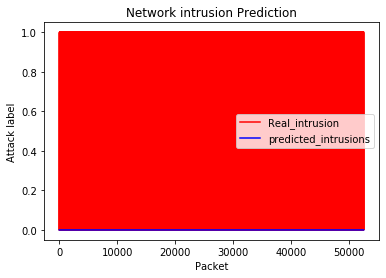

In [159]:
# Visualising the results
plt.plot(Real_intrusion, color = 'red', label = 'Real_intrusion')
plt.plot(predicted_intrusions, color = 'blue', label = 'predicted_intrusions')
plt.title('Network intrusion Prediction')
plt.xlabel('Packet')
plt.ylabel('Attack label')
plt.legend()
plt.show()

In [160]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted_intrusions, Real_intrusion)

array([[16772, 35831],
       [    0,     0]], dtype=int64)

In [122]:
len(predicted_intrusions)

52543

52603

In [161]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

predicted_intrusions

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [188]:
predicted_intrusions.shape

(52543, 1)

In [163]:
arr=predicted_intrusions

In [164]:
is_all_zero = np.all((arr == 0))
if is_all_zero:
    print('Array contains only 0')
else:
    print('Array has non-zero items too')

Array contains only 0


In [167]:
import matplotlib as matplot
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

from keras.models import Model, load_model
from keras.layers import *
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,normalize



In [172]:
# Tuning the RNN
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
def build_regressor(optimizer):
    regressor = Sequential()
    regressor.add(LSTM( units = 50, return_sequences = True, input_shape = (X_train.shape[1], 25) ))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))
    regressor.compile(optimizer = optimizer, loss = 'mean_squared_error')
    return regressor
regressor = KerasRegressor(build_fn = build_regressor)

parameters = { 'epochs' : [20, 500], 'optimizer' : ['adam', 'rmsprop'] }
grid_search = GridSearchCV(estimator = regressor, param_grid = parameters, scoring = 'neg_mean_squared_error', cv = 2)
grid_search = grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_

Epoch 1/100
36320/61339 [================>.............] - ETA: 1:41 - loss: 0.087

KeyboardInterrupt: 